# Stock Prediction of Adani Ports

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import datetime


## Get some info and ProfileReport about our dataset

In [26]:
adani =pd.read_csv(r'D:/Jupyter/stock prediction/adaniports.csv' , index_col ='Date', parse_dates=True)

In [27]:
adani.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
adani.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [5]:
adani.isna().any()

Symbol                False
Series                False
Prev Close            False
Open                  False
High                  False
Low                   False
Last                  False
Close                 False
VWAP                  False
Volume                False
Turnover              False
Trades                 True
Deliverable Volume    False
%Deliverble           False
dtype: bool

In [6]:
adani.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


<AxesSubplot:xlabel='Date'>

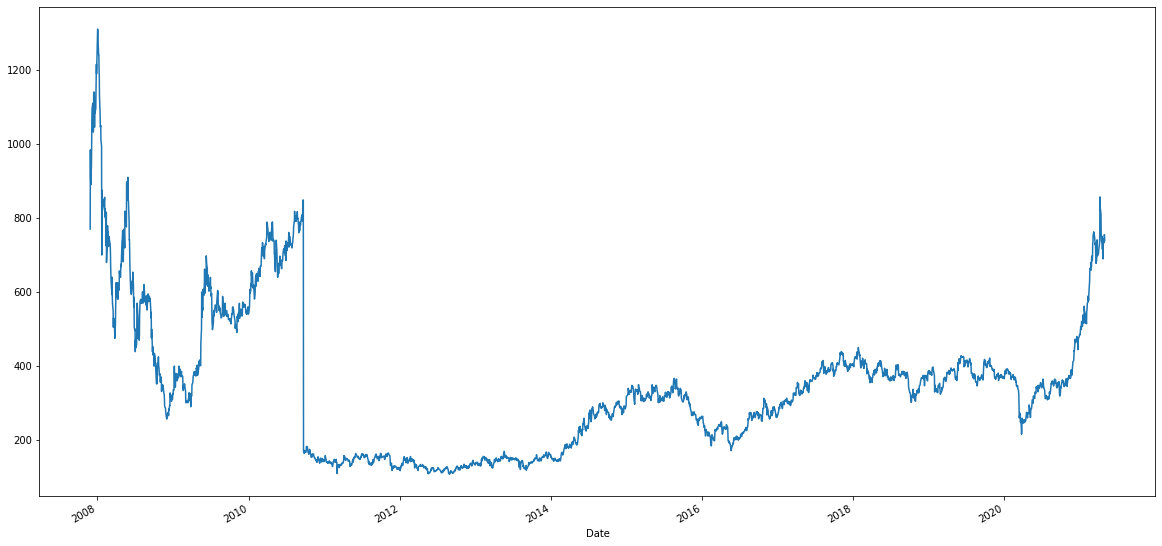

In [7]:
adani['Open'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

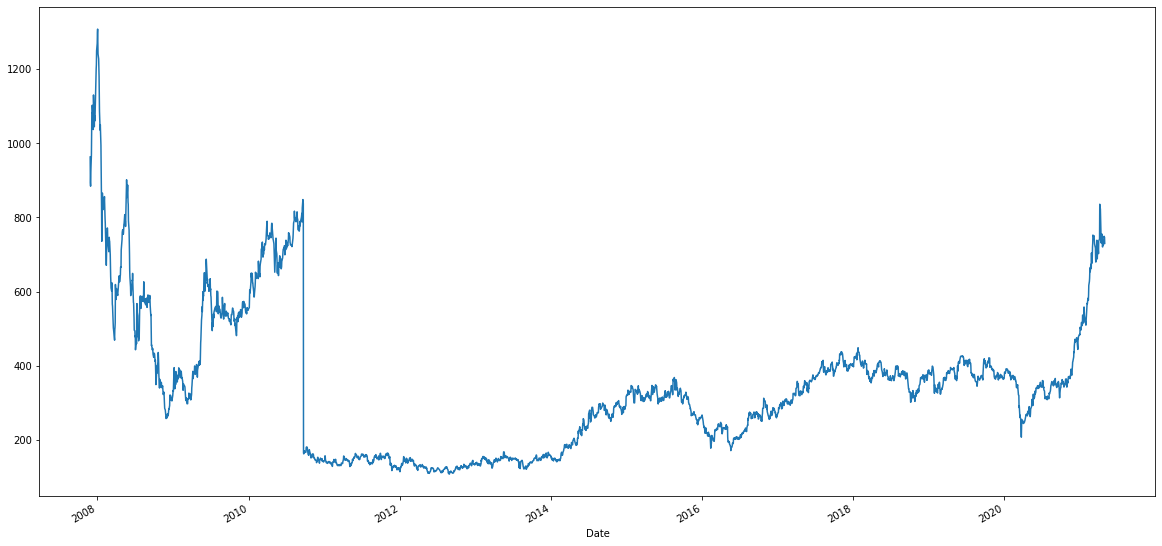

In [8]:
adani['Close'].plot(figsize=(20,10))

In [9]:
adani.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3322 entries, 2007-11-27 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              3322 non-null   object 
 1   Series              3322 non-null   object 
 2   Prev Close          3322 non-null   float64
 3   Open                3322 non-null   float64
 4   High                3322 non-null   float64
 5   Low                 3322 non-null   float64
 6   Last                3322 non-null   float64
 7   Close               3322 non-null   float64
 8   VWAP                3322 non-null   float64
 9   Volume              3322 non-null   int64  
 10  Turnover            3322 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  3322 non-null   int64  
 13  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 389.3+ KB


In [10]:
a= adani.drop("Symbol" ,axis=1).shape ,adani.drop("Series", axis=1).shape

In [11]:
adani.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3322 entries, 2007-11-27 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              3322 non-null   object 
 1   Series              3322 non-null   object 
 2   Prev Close          3322 non-null   float64
 3   Open                3322 non-null   float64
 4   High                3322 non-null   float64
 5   Low                 3322 non-null   float64
 6   Last                3322 non-null   float64
 7   Close               3322 non-null   float64
 8   VWAP                3322 non-null   float64
 9   Volume              3322 non-null   int64  
 10  Turnover            3322 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  3322 non-null   int64  
 13  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 389.3+ KB


In [12]:
adani.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3322 entries, 2007-11-27 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              3322 non-null   object 
 1   Series              3322 non-null   object 
 2   Prev Close          3322 non-null   float64
 3   Open                3322 non-null   float64
 4   High                3322 non-null   float64
 5   Low                 3322 non-null   float64
 6   Last                3322 non-null   float64
 7   Close               3322 non-null   float64
 8   VWAP                3322 non-null   float64
 9   Volume              3322 non-null   int64  
 10  Turnover            3322 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  3322 non-null   int64  
 13  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 389.3+ KB


In [13]:
adani.rolling(7).mean().head(20)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2007-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-05,873.328571,934.107143,1009.035714,903.285714,967.571429,965.107143,972.455714,7.469217e+06,7.272421e+14,NaN,2.414505e+06,0.295629
2007-12-06,965.107143,979.678571,1017.564286,943.428571,986.300000,982.021429,987.071429,3.819952e+06,3.704504e+14,NaN,1.123944e+06,0.311457
2007-12-07,982.021429,996.250000,1038.135714,972.571429,1017.014286,1011.807143,1010.670000,3.486605e+06,3.443747e+14,NaN,1.016014e+06,0.310486


<AxesSubplot:xlabel='Date'>

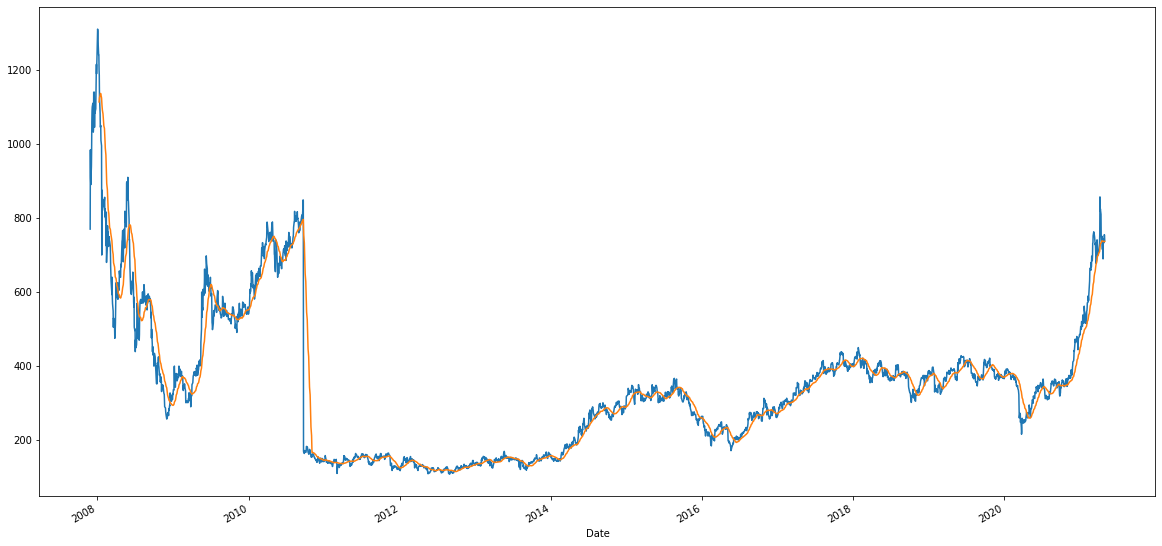

In [14]:
adani['Open'].plot(figsize =(20,10))
adani.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

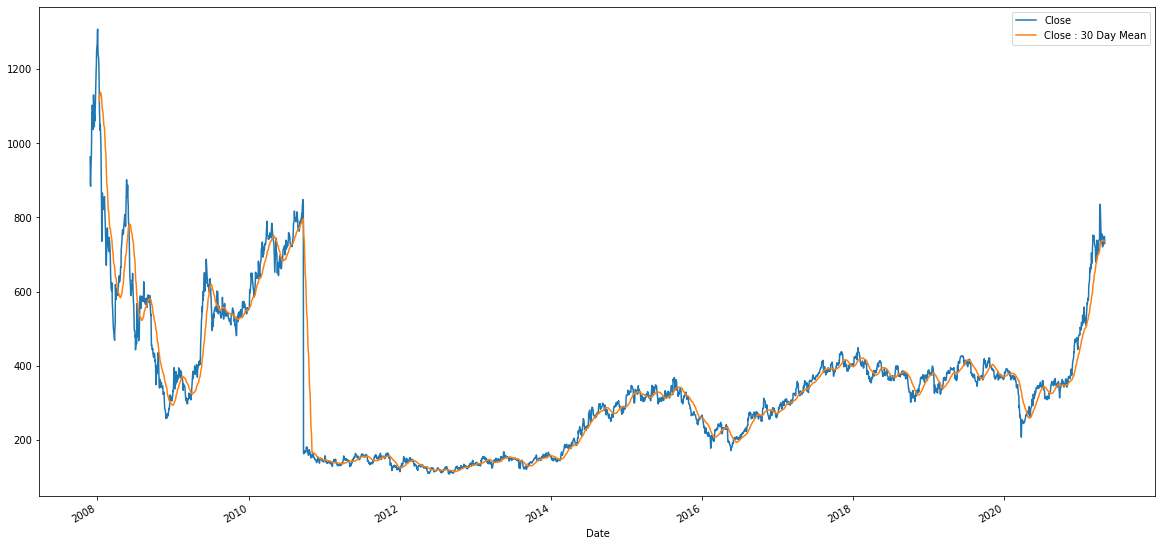

In [15]:
adani['Close : 30 Day Mean']= adani['Close'].rolling(window=30).mean()
adani[['Close' ,'Close : 30 Day Mean']].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

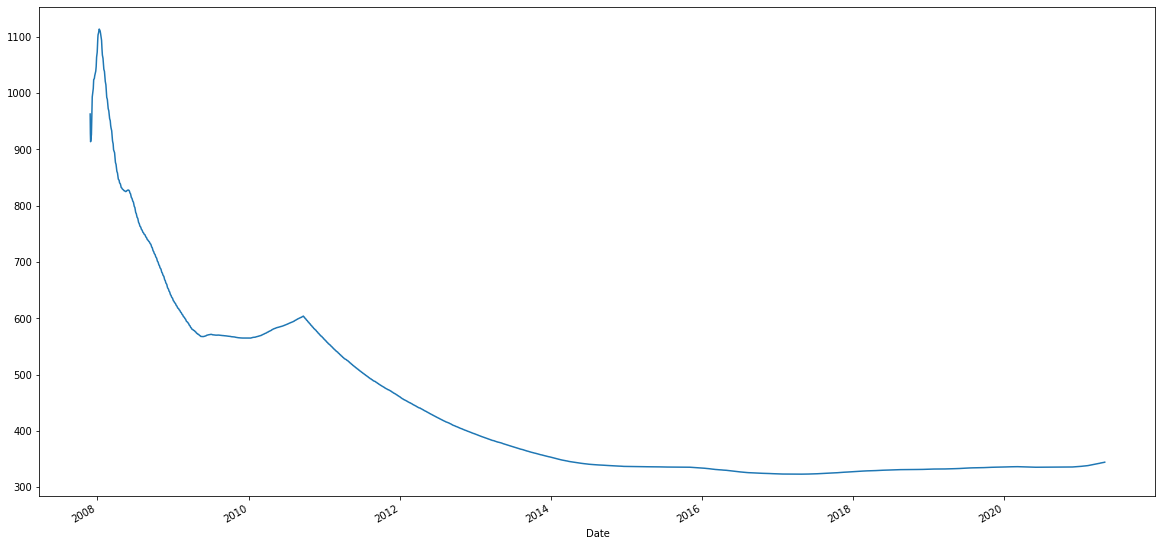

In [16]:
adani['Close'].expanding(min_periods =1).mean().plot(figsize=(20,10))

In [17]:
training_set= adani['Open']
training_set= pd.DataFrame(training_set)

# Data Preprocessing

In [18]:
#data cleaning
adani.isna().any()

Symbol                 False
Series                 False
Prev Close             False
Open                   False
High                   False
Low                    False
Last                   False
Close                  False
VWAP                   False
Volume                 False
Turnover               False
Trades                  True
Deliverable Volume     False
%Deliverble            False
Close : 30 Day Mean     True
dtype: bool

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler(feature_range=(0,1))
training_set_scaled =sc.fit_transform(training_set)

In [20]:
#Creating a data structure with 60 timestep and 1 output
x_train=[]
y_train=[]
for i in range(60 ,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

x_train, y_train = np.array(x_train),np.array(y_train)



In [21]:
#Reshaping
x_train =np.reshape(x_train ,(x_train.shape[0], x_train.shape[1], 1))

# Features Extraction

In [22]:
#importing libraries for building  the RNN model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


ImportError: cannot import name 'get_config' from 'tensorflow.python.eager.context' (c:\users\yashr\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\eager\context.py)

In [ ]:
regressor =Sequential()

# Training the Neural Network

we will feed our data to neural network and trained for prediction assigning random biases and weights.

In [ ]:
#adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences =True , input_shape =(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [ ]:
#adding a second LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences =True ))
regressor.add(Dropout(0.2))

In [ ]:
#adding a third LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences =True ))
regressor.add(Dropout(0.2))

In [ ]:
#adding a fourth LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50 ))
regressor.add(Dropout(0.2))

In [ ]:
#adding the output layers
regressor.add(Dense(units =1))

# We are going to used Adam optimizer
the adam optimizer combines the perks of two others optimizers:
   
   1. ADAgrad
   2. RMSprop

In [ ]:
#compiling the RNN
regressor.compile(optimizer ='adam' , loss='mean_squared_error')

In [ ]:
#fitting the RNN to the Training set
regressor.fit(x_train, y_train ,epochs =10 , batch_size =32)

# Visualization

making  the predictions and visualizating the results

In [ ]:
#getting the real stock price of 2017
adani_test = pd.read_csv('adaniports.csv', index_col ='Date' ,parse_dates=True)

In [ ]:
real_stock_price =adani_test.iloc[:, 1:2].values

In [ ]:
adani_test.tail()

In [ ]:
adani_test.info()

In [ ]:
test_set=adani_test['Open']
test_set= pd.DataFrame(test_set)

In [ ]:
test_set.info()

In [ ]:
adani_total =pd.concat((adani['Open'], adani_test['Open']), axis=0)
inputs =adani_total[len(adani_total)-len(adani_test)-60:].values
inputs =inputs.reshape(-1,1)
inputs =sc.transform(inputs)

x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i, 0])
x_test =np.array(x_test)
x_test =np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price =regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price =pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

# visulizing the results

In [ ]:
plt.plot(predicted_stock_price ,color ='blue' , label= "Predicted AdaniPorts Stock prices")
plt.title("AdaniPorts Stock Prices Predictions")
plt.xlabel("Time")
plt.ylabel("AdaniPorts stock prices")
plt.legend()
plt.show()